# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread("../../_m/genes/diffExpr_maleVfemale_FDR05.txt") %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

Warning message in data.table::fread("../../_m/genes/diffExpr_maleVfemale_FDR05.txt"):
"Detected 16 column names but the data has 17 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000229807.10,ENSG00000229807,XIST,-9.311352,1.025115e-273
ENSG00000114374.12,ENSG00000114374,USP9Y,8.692406,3.696856e-273


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

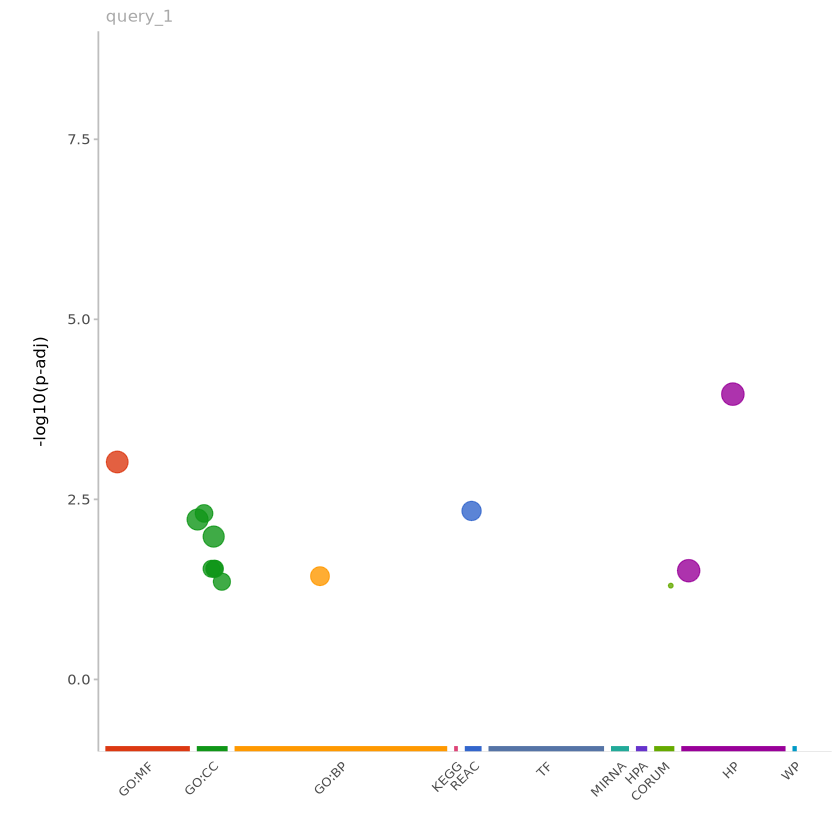

In [15]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "allDEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("allDEGs_manhattan", p, 9, 5)

In [16]:
gostres$result 

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,0.0498802342,2,41,2,0.04878049,1.00000000,CORUM:6826,CORUM,Calprotectin heterotetramer,3627,2399,CORUM:0000000
query_1,TRUE,0.0368428988,41,243,6,0.02469136,0.14634146,GO:0043267,GO:BP,negative regulation of potassium ion transport,17916,12333,"GO:0006813, GO:0043266, GO:0043271"
query_1,TRUE,0.0049528560,25,253,5,0.01976285,0.20000000,GO:0030057,GO:CC,desmosome,18856,1048,GO:0005911
query_1,TRUE,0.0060236578,113,253,9,0.03557312,0.07964602,GO:0000786,GO:CC,nucleosome,18856,112,"GO:0000785, GO:0032993, GO:0044815"
query_1,TRUE,0.0103870334,121,253,9,0.03557312,0.07438017,GO:0044815,GO:CC,DNA packaging complex,18856,2438,GO:0032991
query_1,TRUE,0.0290772012,19,253,4,0.01581028,0.21052632,GO:0043186,GO:CC,P granule,18856,2130,"GO:0036464, GO:0060293"
query_1,TRUE,0.0290772012,19,253,4,0.01581028,0.21052632,GO:0045495,GO:CC,pole plasm,18856,2519,GO:0005737
query_1,TRUE,0.0290772012,19,253,4,0.01581028,0.21052632,GO:0060293,GO:CC,germ plasm,18856,2625,GO:0045495
query_1,TRUE,0.0439607404,21,253,4,0.01581028,0.19047619,GO:0098644,GO:CC,complex of collagen trimers,18856,3627,"GO:0062023, GO:0099080"


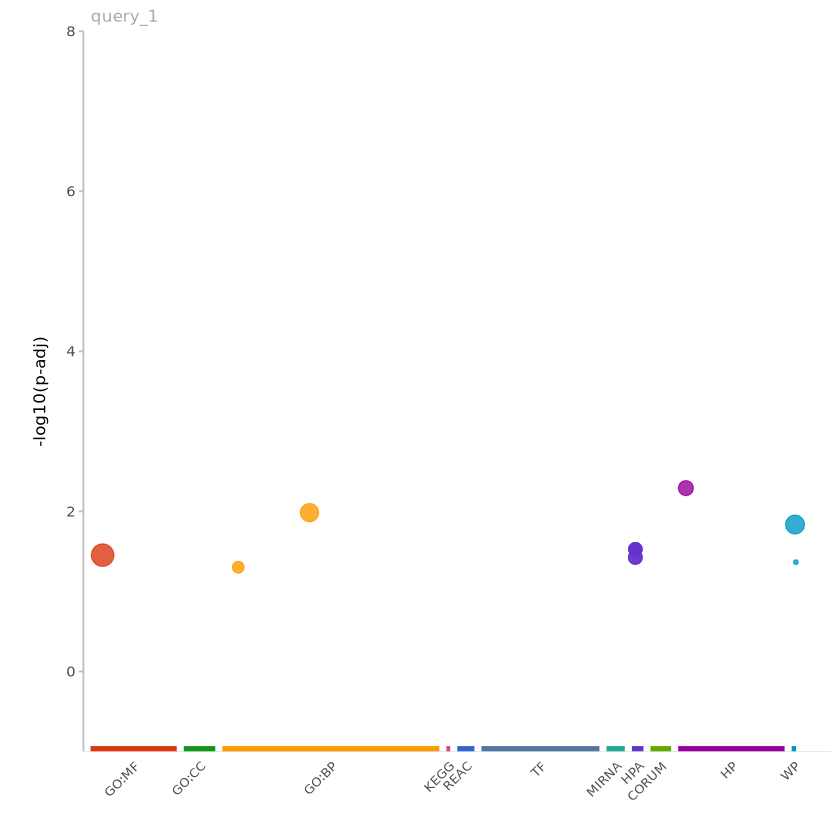

In [20]:
deg_male = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_male$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "male_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("male_bias_DEGs_manhattan", p, 9, 5)

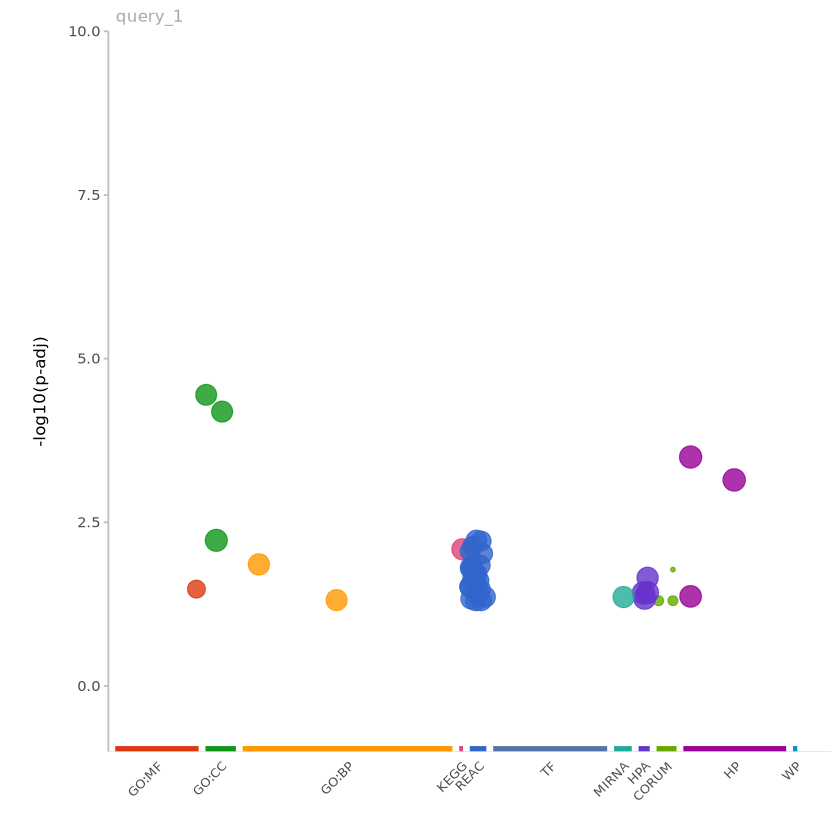

In [22]:
deg_female = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_female$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "female_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("female_bias_DEGs_manhattan", p, 9, 5)